In [45]:
from fastai.imports import *
from pathlib import Path
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import graphviz
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import TargetEncoder

sns_palette = sns.color_palette("muted")

In [2]:


df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
dep = 'Approved'

df[dep] = labels.label.astype(int)

df.loc[df[dep] == 1, 'Status'] = 'Approved'
df.loc[df[dep] == 0, 'Status'] = 'Declined'
print('Total records:', len(df))

Total records: 1548


C:\Users\egors\AppData\Local\Temp\ipykernel_28156\2857228115.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Approved' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[df[dep] == 1, 'Status'] = 'Approved'


In [3]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1,Approved
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1,Approved
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1,Approved


In [4]:
df.drop('Ind_ID', axis=1).describe()

,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,Approved
count,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [5]:
print('Modes')
print('----------------------')
df.drop('Ind_ID', axis=1).mode().iloc[0]

Modes
----------------------


GENDER                                         F
Car_Owner                                      N
Propert_Owner                                  Y
CHILDREN                                     0.0
Annual_income                           135000.0
Type_Income                              Working
EDUCATION          Secondary / secondary special
Marital_status                           Married
Housing_type                   House / apartment
Birthday_count                          -22655.0
Employed_days                           365243.0
Mobile_phone                                 1.0
Work_Phone                                   0.0
Phone                                        0.0
EMAIL_ID                                     0.0
Type_Occupation                         Laborers
Family_Members                               2.0
Approved                                     0.0
Status                                  Declined
Name: 0, dtype: object

In [6]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
Approved             0
Status               0
dtype: int64

In [7]:
approved = df[df[dep] == 1]
declined = df[df[dep] == 0]

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


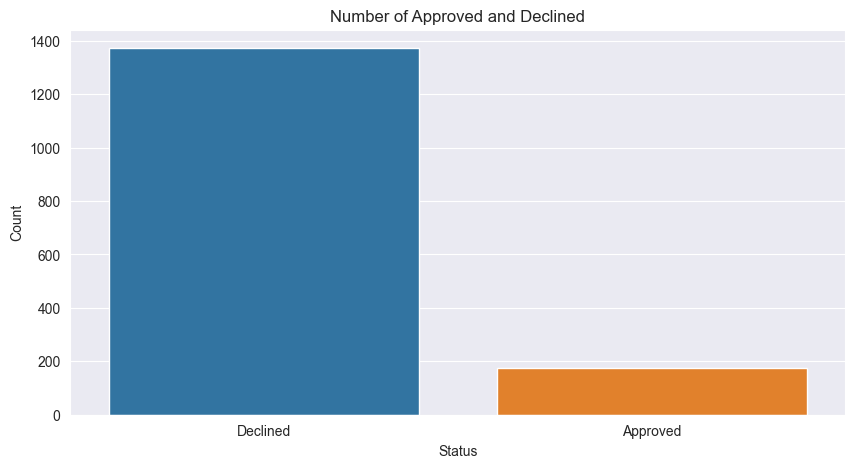

In [8]:


plt.figure(figsize=(10, 5))
ax = sns.barplot(x=df['Status'].value_counts().index, y=df['Approved'].value_counts().values)
plt.title('Number of Approved and Declined')
plt.ylabel('Count');

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


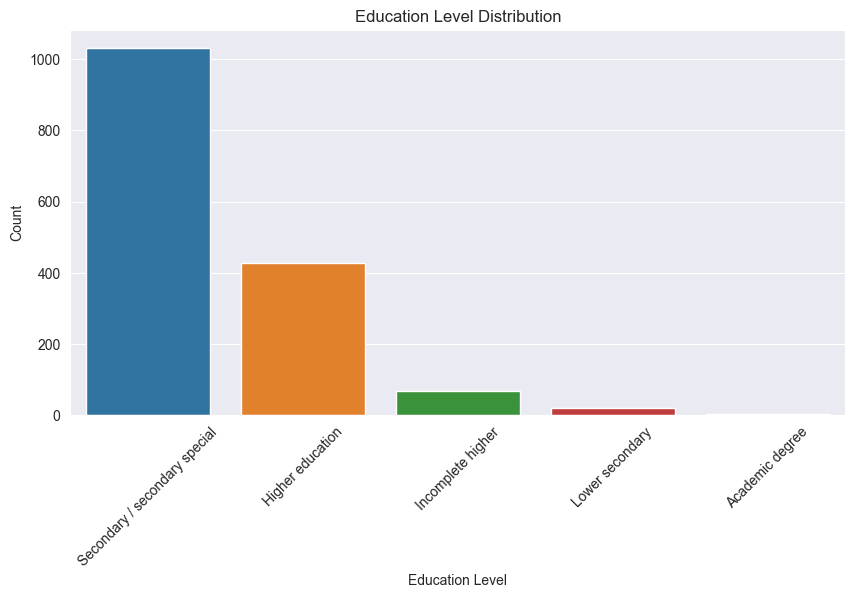

In [9]:
plt.figure(figsize=(10, 5))

eds = df.EDUCATION.value_counts().index
sns.barplot(x=eds, y=df.EDUCATION.value_counts().values)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show();

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


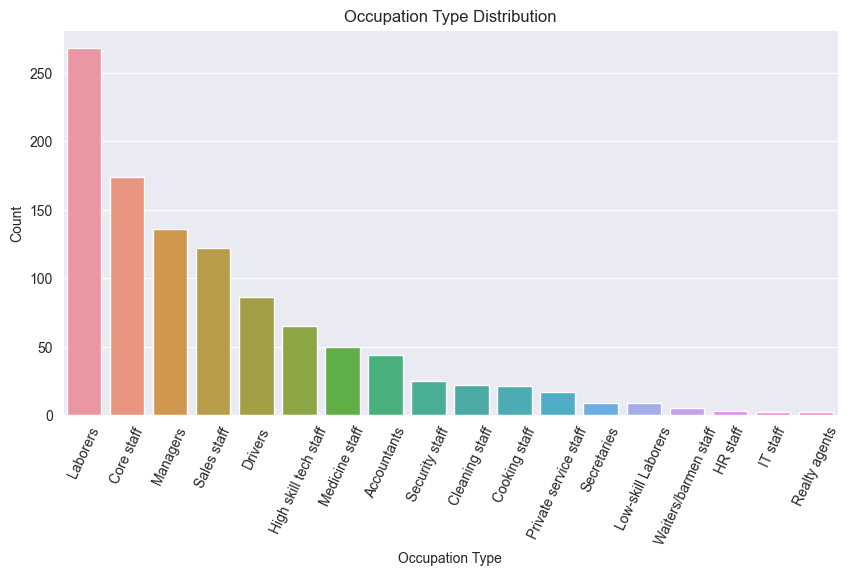

In [10]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Occupation.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Occupation.value_counts().values)
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Occupation Type Distribution')
plt.xticks(rotation=65)
plt.show();

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


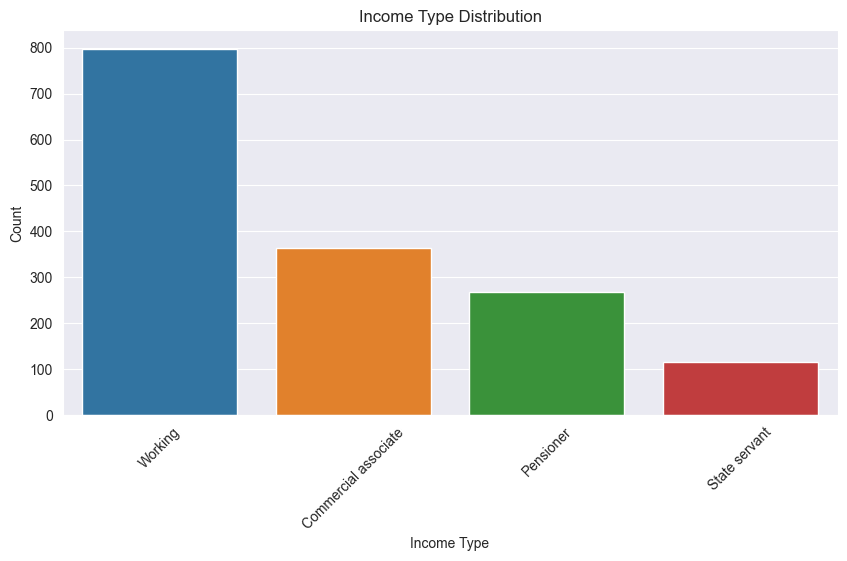

In [11]:
plt.figure(figsize=(10, 5))

occ_types = df.Type_Income.value_counts().index
sns.barplot(x=occ_types, y=df.Type_Income.value_counts().values)
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.title('Income Type Distribution')
plt.xticks(rotation=45)
plt.show()

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


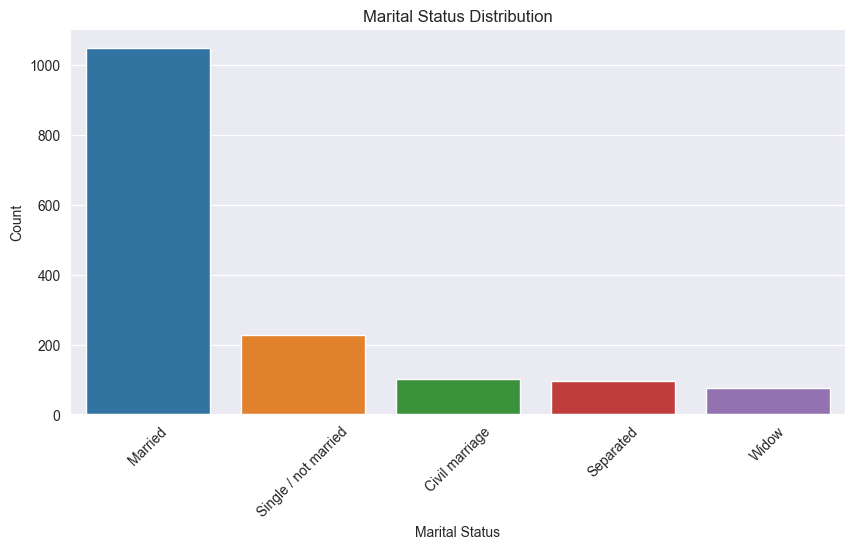

In [12]:
plt.figure(figsize=(10, 5))

marital_types = df.Marital_status.value_counts().index
sns.barplot(x=marital_types, y=df.Marital_status.value_counts().values)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)
plt.show()

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


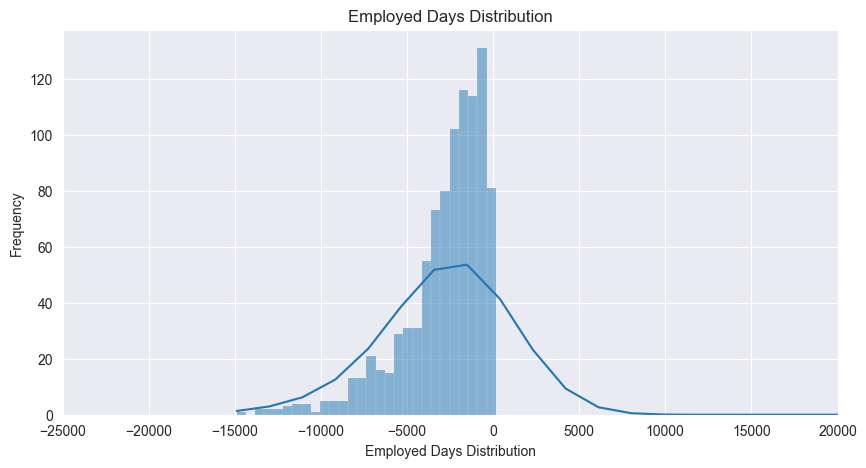

In [13]:
plt.figure(figsize=(10, 5))

emp_days = df.Employed_days.value_counts().index
sns.histplot(x=emp_days, kde=True)
plt.xlabel('Employed Days Distribution')
plt.ylabel('Frequency')
plt.title('Employed Days Distribution')
plt.xlim(-25000, 20000);

E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\PycharmProjects\ML_labs\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


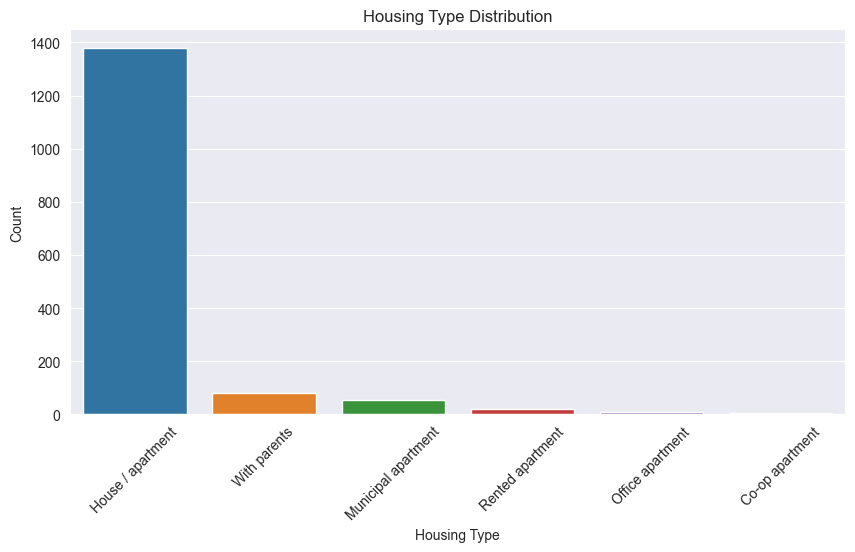

In [14]:
plt.figure(figsize=(10, 5))

housing_types = df.Housing_type.value_counts().index
sns.barplot(x=housing_types, y=df.Housing_type.value_counts().values)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=45)
plt.show()

In [15]:
cats = [
    'GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income',
    'EDUCATION', 'Marital_status', 'Housing_type', 'Mobile_phone',
    'Work_Phone', 'Phone', 'Type_Occupation', 'EMAIL_ID'
]

conts = [
    'CHILDREN', 'Family_Members', 'Annual_income',
    'Age', 'EmployedDaysOnly', 'UnemployedDaysOnly'
]

In [16]:
def proc_data():
    df['Age'] = -df.Birthday_count // 365
    df['EmployedDaysOnly'] = df.Employed_days.apply(lambda x: x if x > 0 else 0)
    df['UnemployedDaysOnly'] = df.Employed_days.apply(lambda x: abs(x) if x < 0 else 0)

    for cat in cats:
        df[cat] = pd.Categorical(df[cat])

    modes = df.mode().iloc[0]
    df.fillna(modes, inplace=True)

proc_data()

# 1. Выбрать подходящую таблицу данных (должна содержать числовые и
категориальные переменные). Временно убрать категориальные признаки.
Построить линейную регрессию.

In [19]:
df_nocats = df.drop(cats,axis=1)
df_nocats

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Family_Members,Approved,Status,Age,EmployedDaysOnly,UnemployedDaysOnly
0,5008827,0,180000.0,-18772.0,365243,2,1,Approved,51.0,365243,0
1,5009744,0,315000.0,-13557.0,-586,2,1,Approved,37.0,0,586
2,5009746,0,315000.0,-22655.0,-586,2,1,Approved,37.0,0,586
3,5009749,0,135000.0,-13557.0,-586,2,1,Approved,37.0,0,586
4,5009752,0,315000.0,-13557.0,-586,2,1,Approved,37.0,0,586
...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,135000.0,-11957.0,-2182,2,0,Declined,32.0,0,2182
1544,5023655,0,225000.0,-10229.0,-1209,1,0,Declined,28.0,0,1209
1545,5115992,2,180000.0,-13174.0,-2477,4,0,Declined,36.0,0,2477
1546,5118219,0,270000.0,-15292.0,-645,2,0,Declined,41.0,0,645


In [25]:
X, y = df_nocats[conts].copy(), df_nocats[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25,random_state=42)

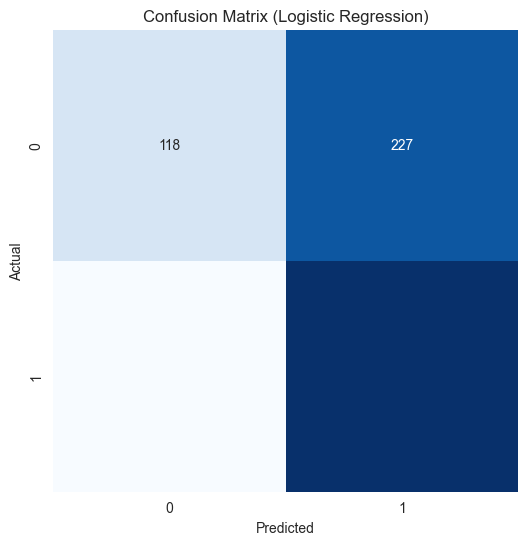

Accuracy of Logistic Regression: 0.537117903930131


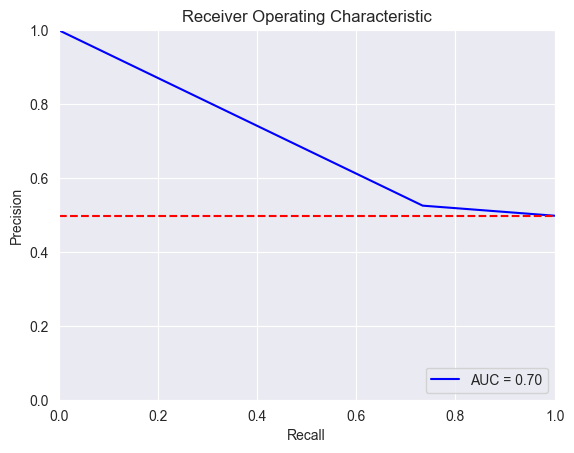

In [31]:
lr_classifier = LogisticRegression(max_iter=1000, random_state=42)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_lr)
pr_auc_lr = auc(recall_lr, precision_lr)
# Визуализация матрицы ошибок
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lr_classifier.classes_, yticklabels=lr_classifier.classes_)
plt.title('Confusion Matrix (Logistic Regression)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f"Accuracy of Logistic Regression: {accuracy_lr}")
plt.title('Receiver Operating Characteristic')
plt.plot(recall_lr, precision_lr, 'b', label = 'AUC = %0.2f' % pr_auc_lr)
plt.legend(loc = 'lower right')
noskill = len(y_test[y_test==1])/len(y_test)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# 2. Построить решение методом бустинга. Сравнить с линейной регрессией.

Accuracy: 0.7991266375545851
F1 Score: 0.8050847457627118
AUC: 0.8474956451189539


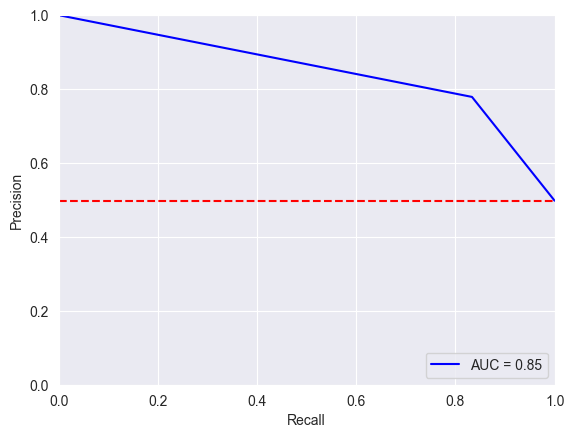

In [35]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

3. Применить one hot и target encoding для категориальных признаков (взять данные,
где такие признаки есть). Сравнить точность.

In [37]:
df_noconts = df.drop(conts,axis=1)
df_noconts = df.drop(["Birthday_count","Employed_days"],axis=1)
df_noconts

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Approved,Status,Age,EmployedDaysOnly,UnemployedDaysOnly
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,0,0,0,Laborers,2,1,Approved,51.0,365243,0
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,Laborers,2,1,Approved,37.0,0,586
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,Laborers,2,1,Approved,37.0,0,586
3,5009749,F,Y,N,0,135000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,Laborers,2,1,Approved,37.0,0,586
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,1,1,0,Laborers,2,1,Approved,37.0,0,586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,135000.0,Commercial associate,Higher education,Married,House / apartment,...,0,0,0,Managers,2,0,Declined,32.0,0,2182
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,0,0,0,Accountants,1,0,Declined,28.0,0,1209
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,...,0,0,0,Managers,4,0,Declined,36.0,0,2477
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,1,1,0,Drivers,2,0,Declined,41.0,0,645


In [42]:
ohe = OneHotEncoder()

X, y = df_noconts[conts].copy(), df_noconts[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)
transformed = ohe.fit_transform(X_over)
X_train, X_test, y_train, y_test = train_test_split(transformed, y_over, test_size=0.25,random_state=42)

Accuracy: 0.851528384279476
F1 Score: 0.8327868852459017
AUC: 0.9092722055851136


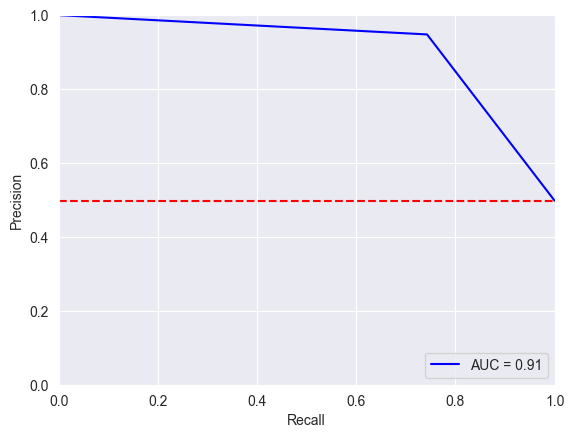

In [43]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [46]:
enc_auto = TargetEncoder(smooth="auto")
X_trans = enc_auto.fit_transform(X_over, y_over)
X_train, X_test, y_train, y_test = train_test_split(X_trans , y_over, test_size=0.25,random_state=42)

Accuracy: 0.9519650655021834
F1 Score: 0.9526542324246772
AUC: 0.9602637711403383


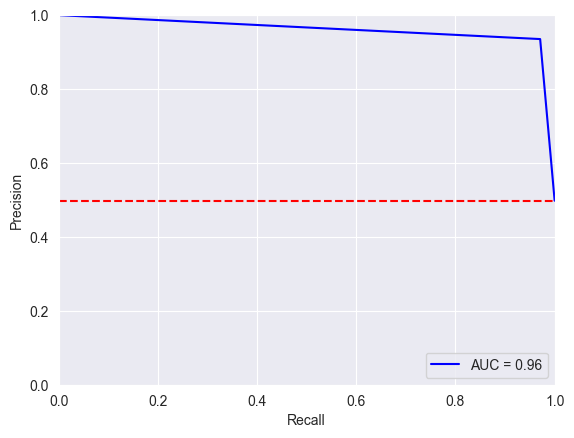

In [47]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)
# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка точности
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f"AUC: {pr_auc}")
plt.plot(recall, precision, 'b', label = 'AUC = %0.2f' % pr_auc)
plt.legend(loc = 'lower right')
noskill = len(y_val[y_val==1])/len(y_val)
plt.plot([0, 1], [noskill, noskill],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [55]:
X, y = df_nocats[conts].copy(), df_nocats[dep]

X_over, y_over = RandomOverSampler().fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.25,random_state=42)

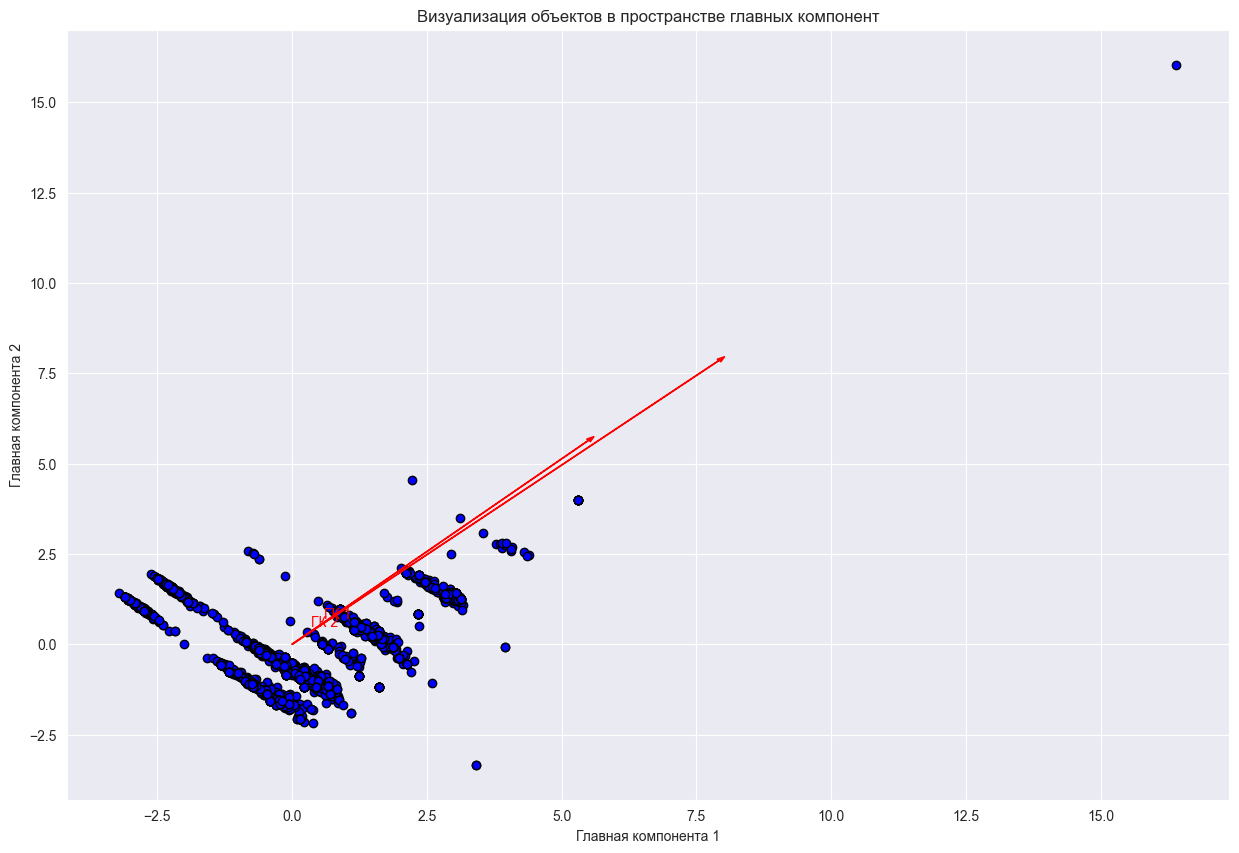

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Предположим, что X - ваш набор данных
# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_over)

# Применяем PCA с двумя компонентами
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(15, 10))
# Визуализируем данные
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o', edgecolor='k')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('Визуализация объектов в пространстве главных компонент')

# Визуализация направлений главных компонент
# Каждая стрелка представляет собой направление главной компоненты
for i, (comp, var) in enumerate(zip(pca.components_, pca.explained_variance_)):
    comp = comp * np.sqrt(var)  # умножаем на корень из собственного значения
    plt.arrow(0, 0, comp[0]*10, comp[1]*10, color=(1, 0, 0), width=0.01, head_width=0.1)
    plt.text(comp[0] + 0.05, comp[1] + 0.05, f'ГК {i+1}', color=(1, 0, 0), ha='center', va='center')

plt.show()
